In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop(['house_rules','license'],axis=1,inplace=True)

In [ ]:
# Only needed if columns were strings with dollar signs
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).astype(float)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).astype(float)


In [ ]:
# Only needed if columns were strings with dollar signs
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).astype(float)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).astype(float)


In [ ]:
df.rename(columns={
    'price':'price_$',
    'service fee':'service fee_$'
}, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['price_$']=df['price_$'].astype(float)

In [ ]:
df['service fee_$']=df['service fee_$'].astype(float)

In [ ]:
df['id']=df['id'].astype(str)

In [ ]:
df['host id']=df['host id'].astype(str)

In [ ]:
df['last review']=pd.to_datetime(df['last review'])

In [ ]:
df['construction year']=df['Construction year'].astype(int)

In [ ]:
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'

In [ ]:
df=df.drop(df[df['availability 365']>500].index)

In [ ]:
df.duplicated().value_counts()

,count
False,83389


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [ ]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,construction year
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369,2012.487810
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000,2003.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000,2007.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000,2012.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000,2017.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000,2022.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544,5.760526


In [ ]:
property_types=df['room type'].value_counts().to_frame()

In [ ]:
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


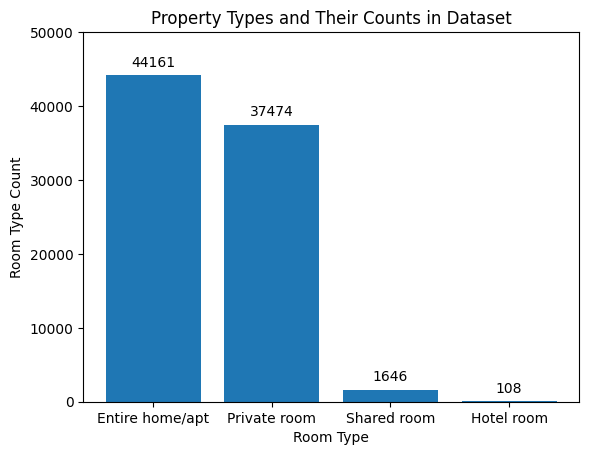

In [ ]:
room_type_bar=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and Their Counts in Dataset');

In [ ]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


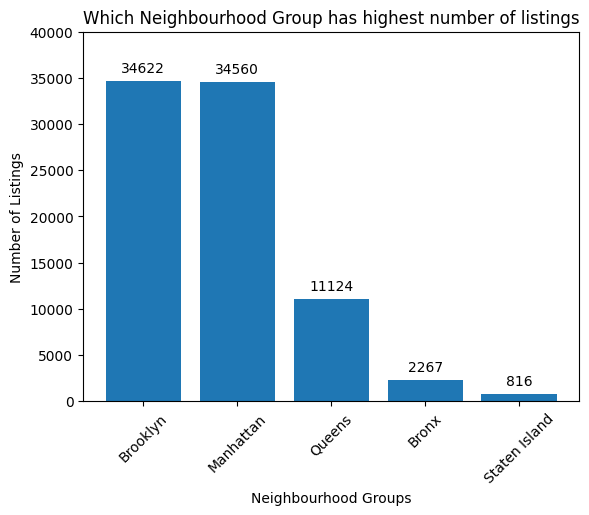

In [ ]:
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45)
plt.title('Which Neighbourhood Group has highest number of listings');

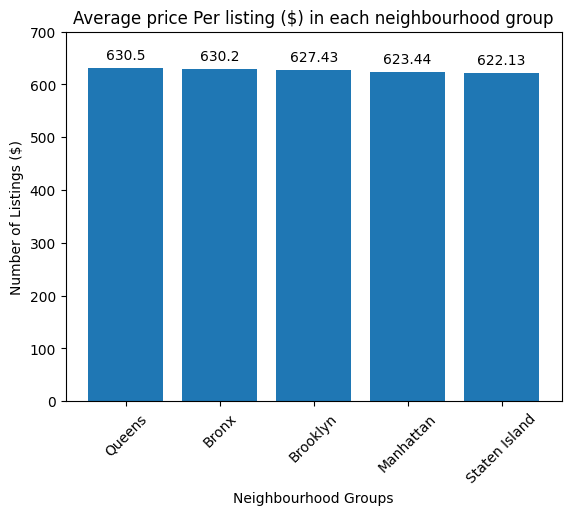

In [ ]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,"price_$"],2),label_type='edge',padding=4);

plt.ylim([0,700]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of Listings ($)');
plt.xticks(rotation=45)
plt.title('Average price Per listing ($) in each neighbourhood group');

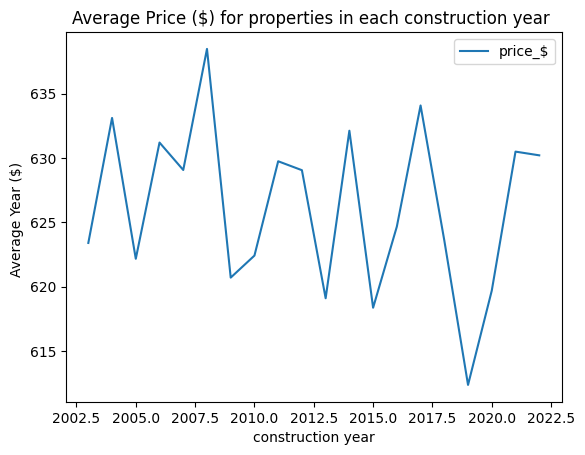

In [ ]:
df.groupby(df['construction year'])['price_$'].mean().to_frame(). plot();
plt. xlabel('construction year');
plt. ylabel('Average Year ($) ')
plt.title('Average Price ($) for properties in each construction year ');
